# Introduction

The data is from Kaggle: https://www.kaggle.com/code/dineshkumar1993/netflix-top-10-analysis/notebook and was initially found on the following website: https://www.springboard.com/blog/data-science/15-fun-datasets-to-analyze/

The premise states that there is missing data, and it would be a nice little project to do some cleaning and slight data
visualization.


Used to indicate the start of a new task/section

# Libraries imported


In [26]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl

import plotly.graph_objects as go

import statistics

# Importing the dataset
From a CSV file

In [2]:
df = pd.read_csv('netflix daily top 10.csv',  index_col=None)
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


# Data description

In [3]:
#Seing basic description of numeric columns
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [4]:
#Seeing basic info of nonnumeric columns
df.describe(exclude='number')

,As of,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date
count,7100,7100,7100,7100,7100,4599,7100
unique,710,11,11,645,4,1,414
top,2020-04-01,-,-,Cocomelon,TV Show,Yes,"Jun 1, 2020"
freq,10,859,3968,428,4446,4599,438


# Data cleaning
Looking for and removing potential duplicates and missing values

In [5]:
#Removes duplicates if any.
df.drop_duplicates()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [6]:
#Checking for any missing values.
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [7]:
df['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

Based on above results it seems Netflix shows are either classified as being exclusive or the value is missing.
For the simplicity's sake, we will assume nan means it is not a Netflix excluse

In [8]:
#Changing Netflix Exclusive "nan" values to "No"
df.fillna('No', inplace=True)

In [9]:
#Checking to see if NaN's have been removed
df.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [10]:
#Looping thought unique values in columns to see if there are missing values potentially missed.
for col in df:
    print(f'{col}: {df[col].unique()}')

As of: ['2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05'
 '2020-04-06' '2020-04-07' '2020-04-08' '2020-04-09' '2020-04-10'
 '2020-04-11' '2020-04-12' '2020-04-13' '2020-04-14' '2020-04-15'
 '2020-04-16' '2020-04-17' '2020-04-18' '2020-04-19' '2020-04-20'
 '2020-04-21' '2020-04-22' '2020-04-23' '2020-04-24' '2020-04-25'
 '2020-04-26' '2020-04-27' '2020-04-28' '2020-04-29' '2020-04-30'
 '2020-05-01' '2020-05-02' '2020-05-03' '2020-05-04' '2020-05-05'
 '2020-05-06' '2020-05-07' '2020-05-08' '2020-05-09' '2020-05-10'
 '2020-05-11' '2020-05-12' '2020-05-13' '2020-05-14' '2020-05-15'
 '2020-05-16' '2020-05-17' '2020-05-18' '2020-05-19' '2020-05-20'
 '2020-05-21' '2020-05-22' '2020-05-23' '2020-05-24' '2020-05-25'
 '2020-05-26' '2020-05-27' '2020-05-28' '2020-05-29' '2020-05-30'
 '2020-05-31' '2020-06-01' '2020-06-02' '2020-06-03' '2020-06-04'
 '2020-06-05' '2020-06-06' '2020-06-07' '2020-06-08' '2020-06-09'
 '2020-06-10' '2020-06-11' '2020-06-12' '2020-06-13' '2020-06-14'
 '2

Some values seem to be "-", for example in case a show did not have a rank in the week before and they will be changed to 0.

Besides that, it is concluded that there are no missing values, other than the Nan's which were transformed to "No"'s

# Exploratory analysis
Includes univariate, bivariate and multivariate analysis

In [11]:
df.shape

(7100, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     7100 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [13]:
#Changing - valeus to 0 as previously described
df['Year to Date Rank']=df['Year to Date Rank'].replace('-',0)
df['Last Week Rank']=df['Last Week Rank'].replace('-',0)

In [14]:
# Converting the data type for the following columns.

df['Year to Date Rank']=df['Year to Date Rank'].astype('int64')
df['Last Week Rank']=df['Last Week Rank'].astype('int64')
df['Netflix Release Date']=pd.to_datetime(df['Netflix Release Date'])
df['As of']=pd.to_datetime(df['As of'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   int64         
 3   Last Week Rank        7100 non-null   int64         
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


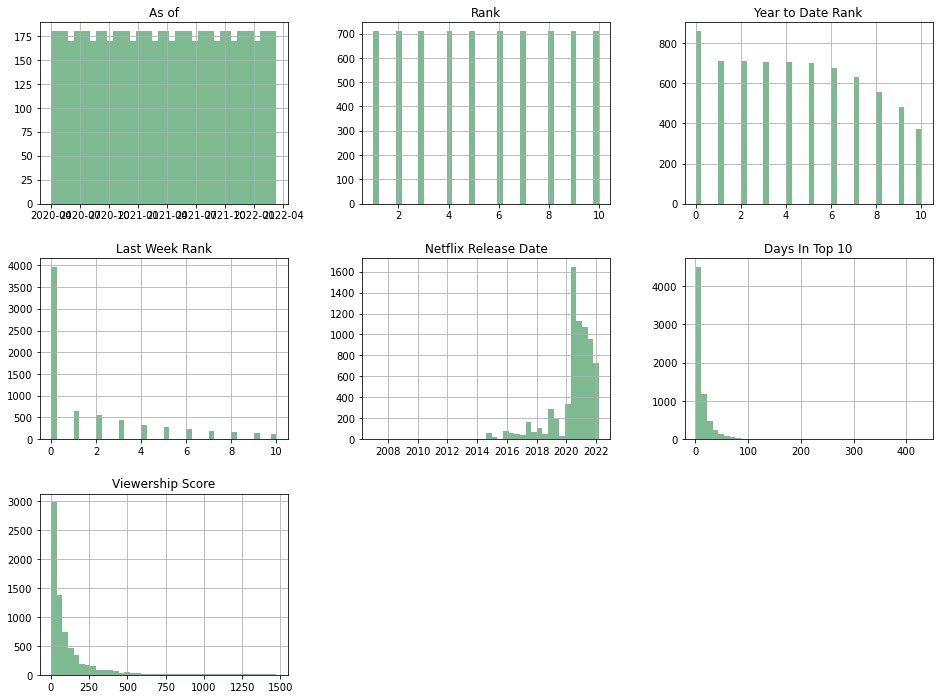

In [15]:
#Create historgrams of all numeric columns
df.hist(bins=40, figsize=(16,12), color = sns.set_palette(sns.color_palette('crest'))) 
#color = 'dodgerblue' -> For a sharp blue color.
plt.show()

Above histograms show that there is a quick drop-off of the time times are in the top 10 as well as the viewershipscore of a media.

Likewise, the most common last week rank is 0, is likely due to media often being popular upon release and dropping off as people finish watching.

## Univariate Analysis
For nonnumeric columns

In [16]:
df['Title'].nunique()

645

There are 645 unique medias in this dataset.

Text(0.5, 1.0, 'Type distribution')

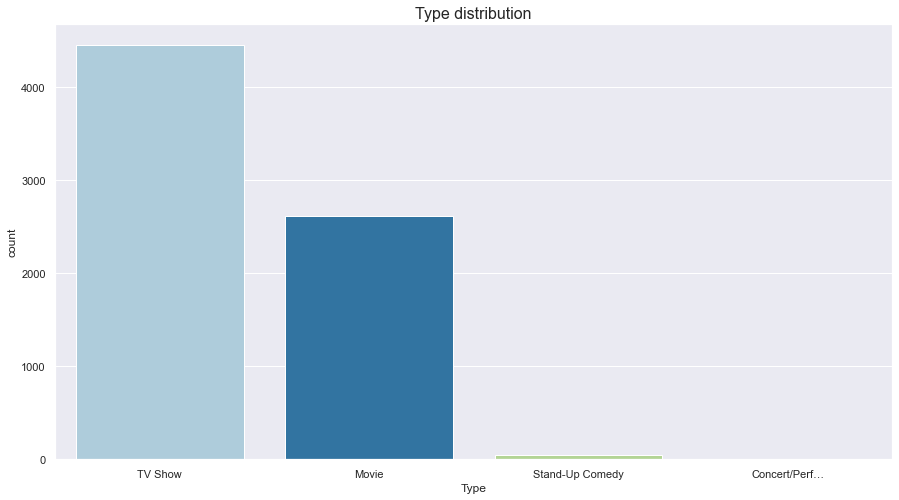

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='Type', data=df, order = df['Type'].value_counts().index)
plt.title('Type distribution', fontsize=16)

A majority of TV shows are in this dataset, followed by movies, some standud and visibly, no concerts

Text(0.5, 1.0, 'Netflix Exclusive distribution')

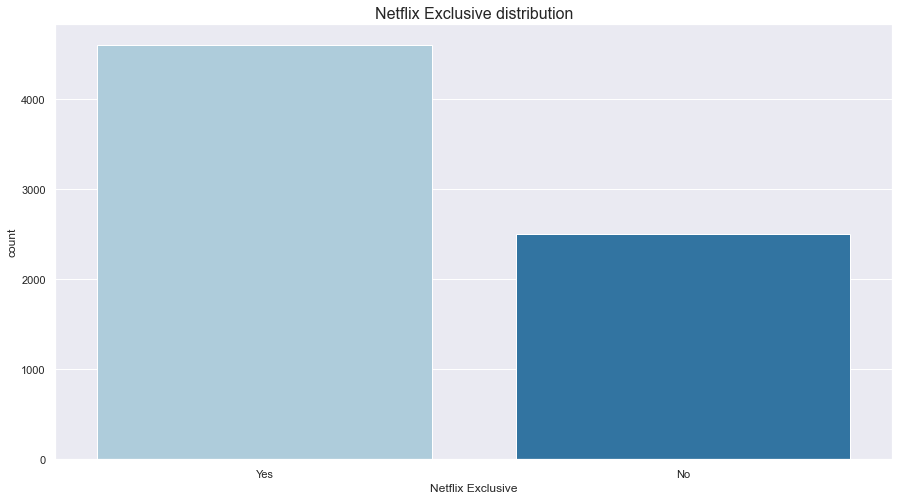

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette(sns.color_palette('Paired'))
sns.countplot(x='Netflix Exclusive', data=df, order = df['Netflix Exclusive'].value_counts().index)
plt.title('Netflix Exclusive distribution', fontsize=16)

Most of the shows released on Netflix, based on this particular dataset, are Netflix exclusive.

## Bivariate analysis
Aiming to find any possible connections between variables

<AxesSubplot:xlabel='Netflix Exclusive', ylabel='Rank'>

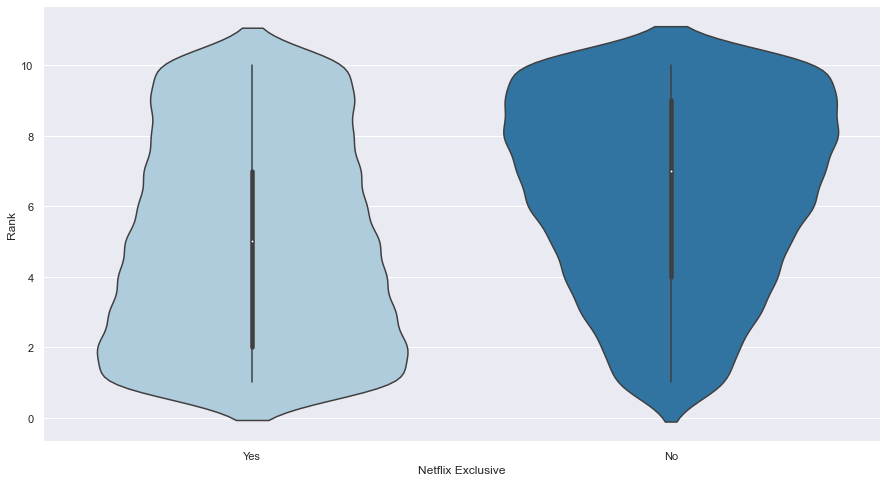

In [19]:
#relationship between Netflix exclusivity and
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=df, x='Netflix Exclusive', y='Rank')

The violin plot seems to indicate that netflix exclusives tend to outrank non-Netflix exclusives.

<AxesSubplot:xlabel='Netflix Exclusive', ylabel='Days In Top 10'>

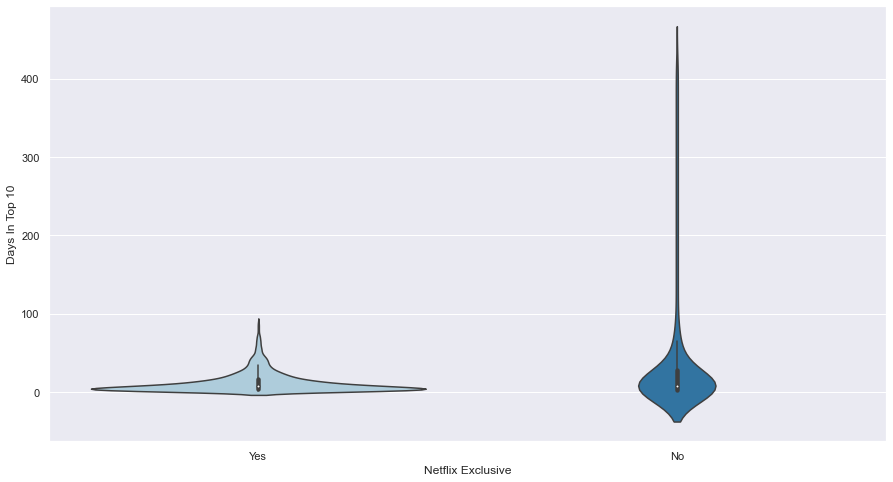

In [20]:
#relationship between Netflix exclusivity and
sns.set_palette(sns.color_palette('Paired'))
sns.violinplot(data=df, x='Netflix Exclusive', y='Days In Top 10')

There seems to be a clear outlier in the non-Netflix exclusive media which had an incredible success and stayed in the top 10 for more than 400 days.

Netflix exclusive shows generally do not tend to stay in the top 10 very long, but generally still seem to say ther longer than non-Netflix exclusive shows.

Text(0.5, 1.0, 'Title on Days in top 10')

C:\Users\Public\Conda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Public\Conda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


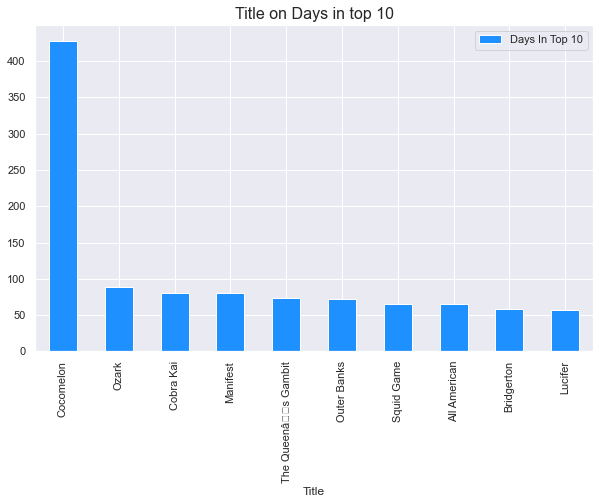

In [21]:
Title_days = df['Days In Top 10'].groupby(df['Title']).max().sort_values(ascending=False)
frame_td = pd.DataFrame(Title_days)


frame_td[:10].plot(kind="bar",figsize=(10,6), color="dodgerblue") #dodgerblue
plt.title("Title on Days in top 10", fontsize=16)

Cocomelon is by far the media that has been in the top 10 the longest on Netflix, a popular childrens show.

## Multivariate analysis


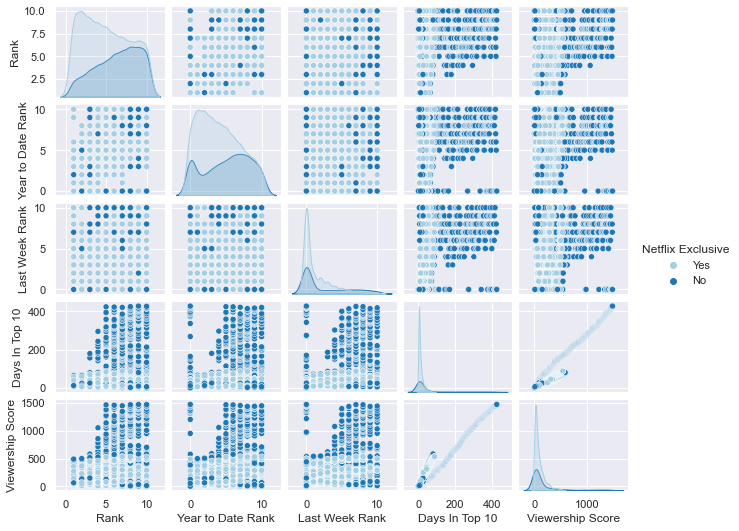

In [23]:
#We keep it commented out unless running code where it's needed, since it's taxing on the environment
sns.pairplot(df,hue='Netflix Exclusive', height=1.5, aspect=1.2)
plt.show()

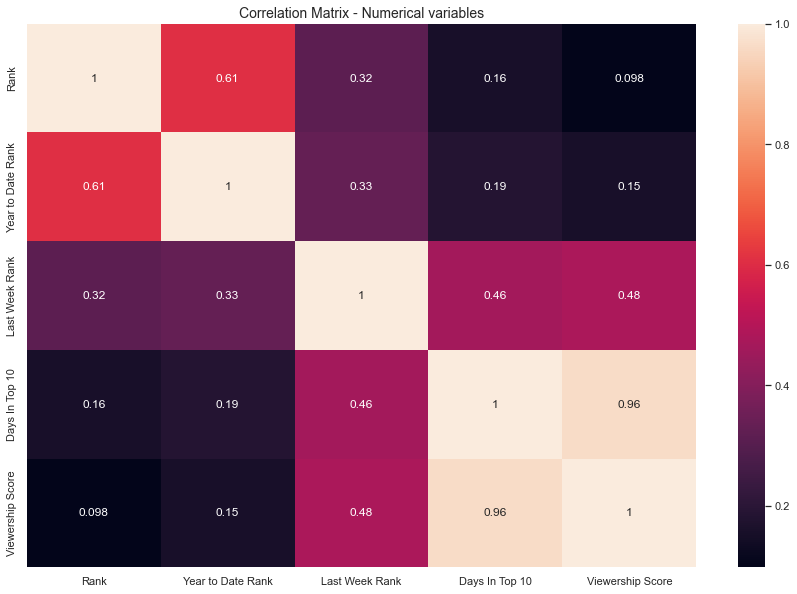

In [24]:
#Heatmap of numeric variables
numeric_df = df.select_dtypes(exclude='object')
numeric_correl = numeric_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(numeric_correl, cbar=True, annot=True)# can use linewidths=.4 to have space between boxes
plt.title("Correlation Matrix - Numerical variables", fontsize=14)
plt.show()

Very high correlation found between days a media is in the top 10 and the viewership score

# Conclusion

It was found the Netflix Exclusive media tend to perform better than non-Netflix exclusive media.

At the same time, there are variables with high correlation, specifically days in top 10 and viewership score.

Likewise, year to date rank and rank also shows somewhat high correlation.

Ultimately, it can be determined that there was a clear outlier with regard to popularity and stand-up comedy only take up a small portion of the available media on Netflix.